<a href="https://colab.research.google.com/github/RahulTechTutorials/Deep_learning/blob/master/Advanced_RNN_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os, shutil
from google.colab import drive
from tqdm import tqdm
import pickle

In [3]:
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
os.getcwd()
os.chdir('/gdrive/My Drive/colab_datasets/base_dir_climate')

In [5]:
os.getcwd()
#os.mkdir('base_dir_climate')

'/gdrive/My Drive/colab_datasets/base_dir_climate'

In [0]:
#!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
#!unzip jena_climate_2009_2016.csv.zip

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  


In [0]:
import pandas as pd
df = pd.read_csv('jena_climate_2009_2016.csv')
  

In [7]:
df.head(1)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.4,-8.9,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3


In [17]:
df.shape

(420551, 15)

In [0]:
import numpy as np
climate_ar = np.asarray(df.iloc[:,1:])

In [0]:
header = []
data = []
with open('jena_climate_2009_2016.csv') as c_file:
  for i,row in enumerate(c_file.read().split('\n')):
    if i == 0:
      header.extend(row.split(','))
    else :
      data.append(row.split(','))
  
  

In [0]:
climate_data = np.zeros((len(data), len(data[0])-1))
for i,row in enumerate(data):
  climate_data[i] = [float(val) for val in row[1:]]

In [93]:
climate_data.shape

(420551, 14)

In [94]:
climate_data[:,1].shape

(420551,)

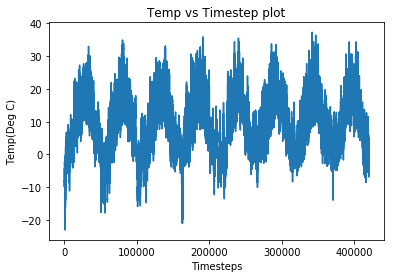

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(len(climate_data)),climate_data[:,1])
plt.xlabel('Timesteps')
plt.ylabel('Temp(Deg C)')
plt.title('Temp vs Timestep plot')
plt.show()

In [47]:
climate_data[:1440,1].shape

(1440,)

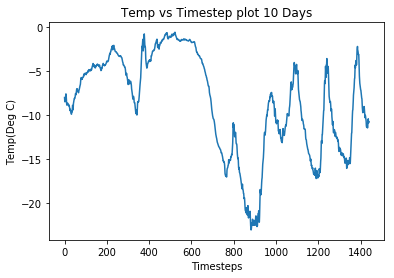

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(len(climate_data[:1440,1])),climate_data[:1440,1])
plt.xlabel('Timesteps')
plt.ylabel('Temp(Deg C)')
plt.title('Temp vs Timestep plot 10 Days')
plt.show()

## Data Preprocess - Normalization

In [0]:
mean = np.mean(climate_data,axis=0)
climate_data -= mean
std = np.std(climate_data,axis=0)
climate_data /= std


In [0]:
import cv2